<a href="https://colab.research.google.com/github/nisanuro/CNG483-Assignment1/blob/master/CNG483_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1369]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def readImages(path):
    images = []

    for filename in os.listdir(path):
        img=cv2.imread(os.path.join(image_path, filename),cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)

    return images

In [0]:
def grayWorld(img):
    b,g,r = cv2.split(img)

    b = b + (b / b.mean().mean()).astype(np.uint8)
    g = g + (g / g.mean().mean()).astype(np.uint8)
    r = r + (r / r.mean().mean()).astype(np.uint8)

    img = cv2.merge((b,g,r))
    
    return img

In [0]:
def displayHistogram(img):
    color = ('b','g','r')

    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [0]:
def thresholdingRGB(img):
    # Remember -> OpenCV stores things in BGR order
    lowerBound = (80,60,25)
    upperBound = (120,110,140)

    img = cv2.GaussianBlur(img,(7,7),0)
    
    mask = cv2.inRange(img, lowerBound, upperBound);
   
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
    result = cv2.bitwise_and(img,img,mask=mask)
    '''kernel = np.ones((3,3),np.uint8)    
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)'''

    result[np.all(result != 0, axis=-1)] = [255, 255, 255]


    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()


Used the link below for the ranges of Cb and Cr.
https://www.researchgate.net/publication/290440563_Skin_Segmentation_Using_YCBCR_and_RGB_Color_Models

In [0]:
def thresholdYCB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    blur = cv2.GaussianBlur(img,(5,5),0)
    
    lowerBound = (0,77,133)
    upperBound = (255,127,173)

    mask = cv2.inRange(blur, lowerBound, upperBound);

    kernel = np.ones((3,3),np.uint8)
    mask = cv2.erode(mask,kernel,iterations = 2)

    result = cv2.bitwise_and(blur,blur,mask=mask)
    result[np.all(result != 0, axis=-1)] = [255, 255, 255]
    
    '''
    # Remember -> OpenCV stores things in BGR order
    lowerBound = (0,77,133)
    upperBound = (255,127,173)

    mask1 = cv2.inRange(img1, lowerBound, upperBound);
  
    #mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
    #mask1 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
    #kernel = np.ones((3,3),np.uint8)
    #mask1 = cv2.dilate(mask1,kernel,iterations = 10)

    result1 = cv2.bitwise_and(img1,img1,mask=mask1)
    result1[np.all(result1 != 0, axis=-1)] = [255, 255, 255]
    result1 = cv2.bitwise_not(result1)

    lowerBound = (150,110,100)
    upperBound = (190,140,130)

    mask2 = cv2.inRange(img, lowerBound, upperBound);
    kernel = np.ones((3,3),np.uint8)
    mask2 = cv2.dilate(mask2,kernel,iterations = 3) 
    #mask2 = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
    #mask2 = cv2.morphologyEx(mask2, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))

    result2 = cv2.bitwise_and(img,img,mask=mask2)
    result2[np.all(result2 != 0, axis=-1)] = [255, 255, 255]
    result2 = cv2.bitwise_not(result2)

    result = cv2.bitwise_and(result1, result2)
     '''                        
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()

    

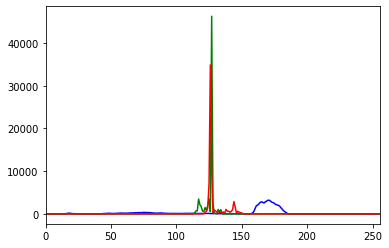

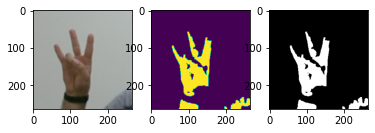

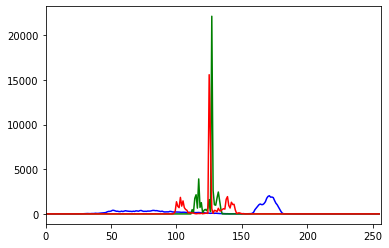

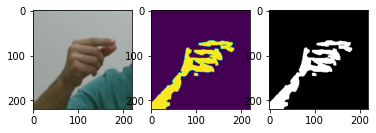

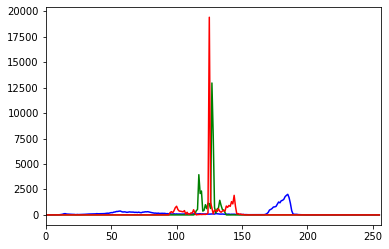

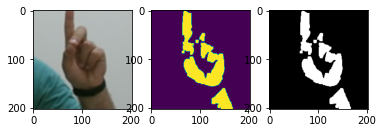

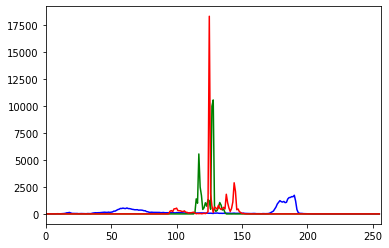

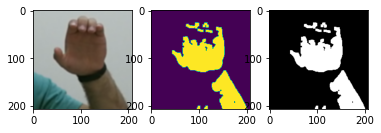

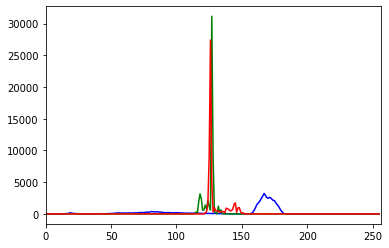

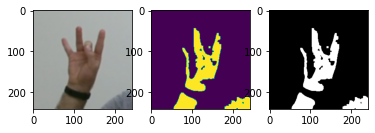

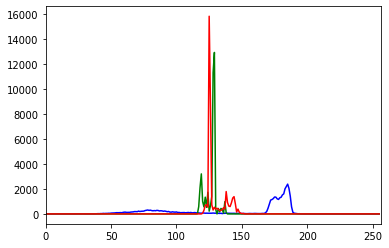

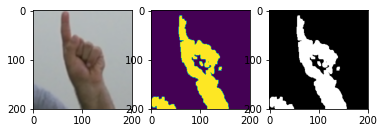

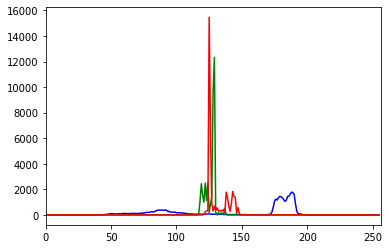

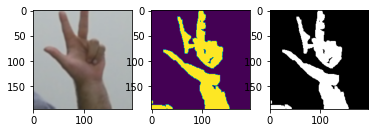

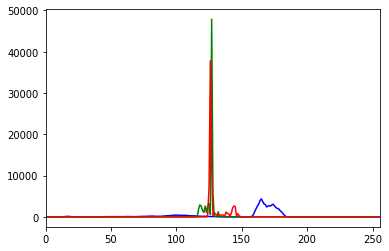

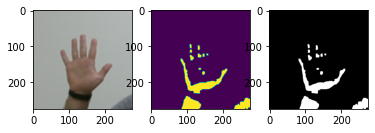

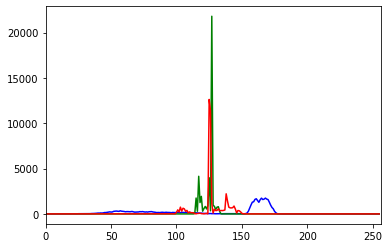

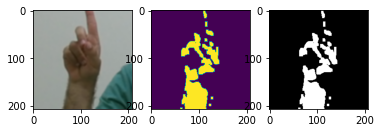

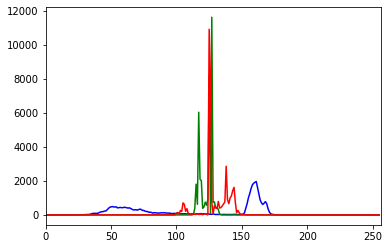

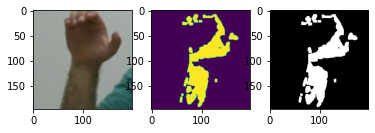

In [1375]:
if __name__ == "__main__":

    image_path = "/content/drive/My Drive/Dataset"

    images = readImages(image_path)

    for i in images:
        #print("Original")
        #plt.imshow(i)  
        #plt.show()
        
        #print("the func")
        #plt.imshow(gray_world(i))
        #plt.show()
        #print("grayWorld")
        gray = grayWorld(i)
        #plt.imshow((gray*255).astype(np.uint8))
        #plt.imshow(gray)
        #plt.show()

        #displayHistogram(i)
        displayHistogram(cv2.cvtColor(gray, cv2.COLOR_BGR2YCrCb))
        '''plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2YCrCb))
        plt.show()'''
        thresholdingRGB(gray)

        